The notebook is clear and organized and easy to follow. I would recommend using a heatmap which can show the correlation to BeatsPerMinutes to help see the strongest predictors for your final model. Possibly add more headings and descriptions.

In [1]:
import pandas as pd

# Load the training data
df = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")

# Show the first few rows
df.head()


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


Look at data

In [2]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


Check for missing data

In [3]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

Look at data in visual form

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


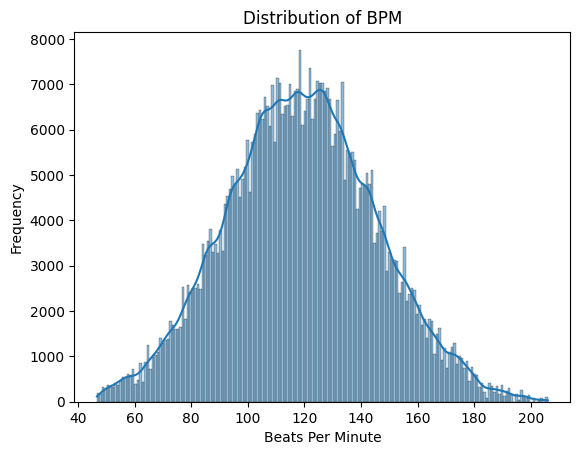

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (BPM)
sns.histplot(df['BeatsPerMinute'], kde=True)
plt.title("Distribution of BPM")
plt.xlabel("Beats Per Minute")
plt.ylabel("Frequency")
plt.show()


Ridge Regression model
Train test split model validation
Mean squared error 


In [5]:
# Imports
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Features and target
X = df.drop(columns=['BeatsPerMinute'])
y = df['BeatsPerMinute']


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)


# Fit Random Forest with custom parameters
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Random Forest MSE:", mse_rf)



# Plot predictions from both models
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_ridge, alpha=0.5, label="Ridge Predictions")
plt.scatter(y_val, y_pred_rf, alpha=0.5, label="Random Forest Predictions", color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Ideal Prediction Line")
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title("Model Comparison: Ridge vs Random Forest")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# Retrain Random Forest on full training data
rf.fit(X, y)

# Load test.csv and predict
test_df = pd.read_csv("test.csv")
test_preds = rf.predict(test_df)

# Save submission file
submission = pd.DataFrame({"Id": test_df.index, "BeatsPerMinute": test_preds})
submission.to_csv("submission.csv", index=False)
